1/1 [==============================] - 0s 350ms/step
Predicted class: 01-minor
Severity probability: 0.88
Estimated repair cost: ₹8792.33


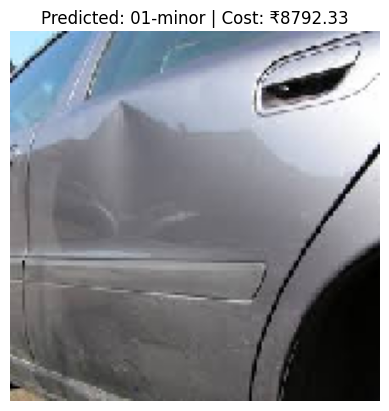

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("car_damage_severity_model.h5")

# Define class labels and corresponding maximum repair costs
class_labels = ['01-minor', '02-moderate', '03-severe']
repair_costs = [10000, 50000, 100000]  # Maximum repair cost for each class

def prepare_image(image_path):
    """Load and preprocess the image."""
    img = load_img(image_path, target_size=(150, 150))  # Use the same target size as during training
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_damage_severity(image_path):
    """Predict the damage severity and estimate the repair cost for a car image."""
    # Prepare the image
    img = prepare_image(image_path)
    
    # Make prediction
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the index of the highest score
    severity_probability = predictions[0][predicted_class]  # Get the probability of the predicted class
    
    # Calculate estimated repair cost based on severity probability
    estimated_cost = severity_probability * repair_costs[predicted_class]
    
    return class_labels[predicted_class], severity_probability, estimated_cost

# Test with a sample image
test_image_path = "C:\\Users\\Pc\\OneDrive\\Desktop\\car_damage\\damage_severity\\training\\01-minor\\0001.JPEG"
predicted_class, severity_probability, estimated_cost = predict_damage_severity(test_image_path)

# Display results
print(f"Predicted class: {predicted_class}")
print(f"Severity probability: {severity_probability:.2f}")
print(f"Estimated repair cost: ₹{estimated_cost:.2f}")

# Display the test image
img = load_img(test_image_path, target_size=(150, 150))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} | Cost: ₹{estimated_cost:.2f}")
plt.axis('off')
plt.show()